In [133]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh_TGV1')
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import Optics
from HHG import ActiveGrating
import Graph

Grating = Optics.Grating()

In [252]:
IR = Optics.Beam(w0=50e-6, lam=800e-9)

charge = 2

grid = IR.Grid(Lx=1e-3, Ly=1e-3, Nx=500, Ny=500)
duration = 5e-15
t_axis = np.linspace(-5*duration, 2*duration, 500)

E1 = IR.LGBeam(*grid, z=0, l=2, p=0)
E2 = IR.LGBeam(*grid, z=0, l=-3, p=0)

def envelope(t, dur):
    return np.exp(-t**2/dur**2) * np.exp(1j*IR.omega*t)

tau = 0*duration
E = np.multiply.outer(envelope(t_axis, duration), E1) + np.multiply.outer(envelope(t_axis+tau, duration), E2)

c:\Users\tg263331\Anaconda3\envs\test_env\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


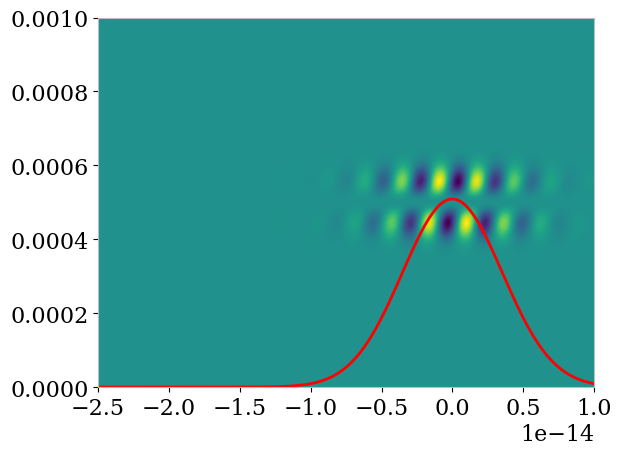

In [253]:
extent=[t_axis[0], t_axis[-1], 0, 1e-3]
plt.imshow(np.real(E[:, :, 250]).T, aspect='auto', extent=extent)
env = np.abs(E[:, 250, 250])/np.max(E[:, 250, 250])*5e-4
plt.plot(t_axis, env, color='r')

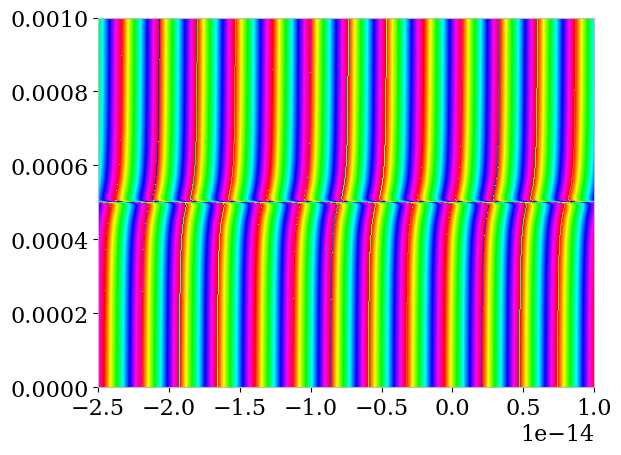

In [254]:
extent=[t_axis[0], t_axis[-1], 0, 1e-3]
plt.imshow(np.angle(E[:, :, 250]).T, aspect='auto', extent=extent, cmap='hsv', vmin=-np.pi, vmax=np.pi)

In [255]:
AG = ActiveGrating(qeff=3.5)
XUV_NF = AG.Hq_NearField(IRfield=E, q=15)

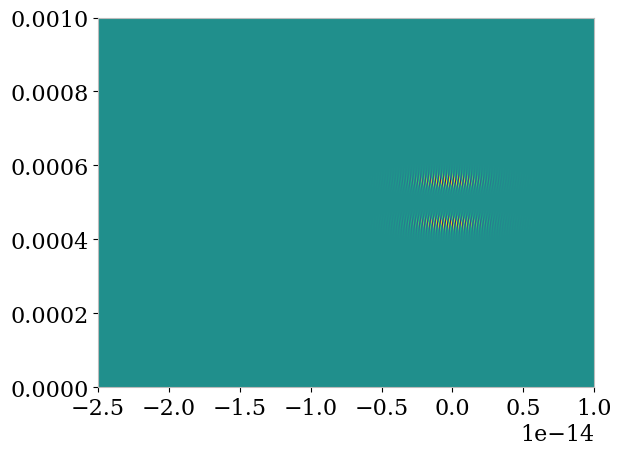

In [256]:
plt.imshow(np.real(XUV_NF[:, :, 250]).T, aspect='auto', extent=extent)

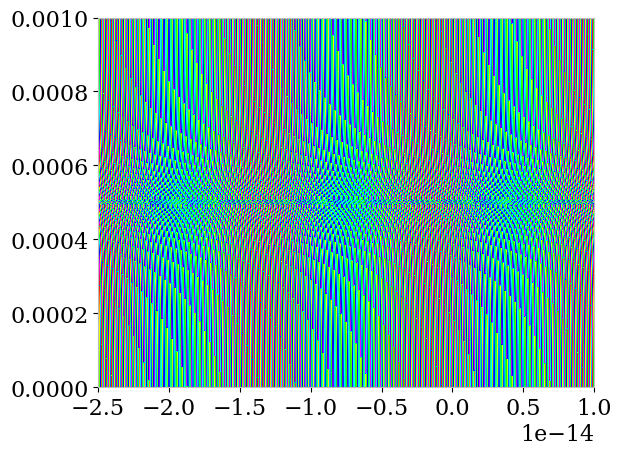

In [257]:
plt.imshow(np.angle(XUV_NF[:, :, 250]).T, aspect='auto', extent=extent, cmap='hsv', vmin=-np.pi, vmax=np.pi)

In [258]:
"TF en temps"

XUV_NF_sp, w_axis = Grating.Disperse2(XUV_NF, t_axis)

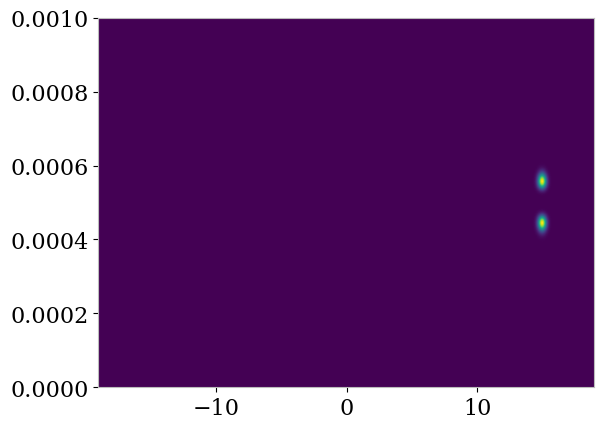

In [259]:
extentw=[w_axis[0]/IR.omega, w_axis[-1]/IR.omega, 0, 1e-3]
plt.imshow(np.abs(XUV_NF_sp[:, :, 250]).T, aspect='auto', extent=extentw)

In [260]:
"Propagation simple - monochromatique à qw"

q=15
XUV = Optics.Beam(w0=1, lam=IR.lam/q)

XUV_FF = []
for slice in XUV_NF:
    sliceFF, grid_FF = XUV.Fraunhofer(field_0=slice, grid_0=grid, d=1)
    XUV_FF.append(sliceFF)
    


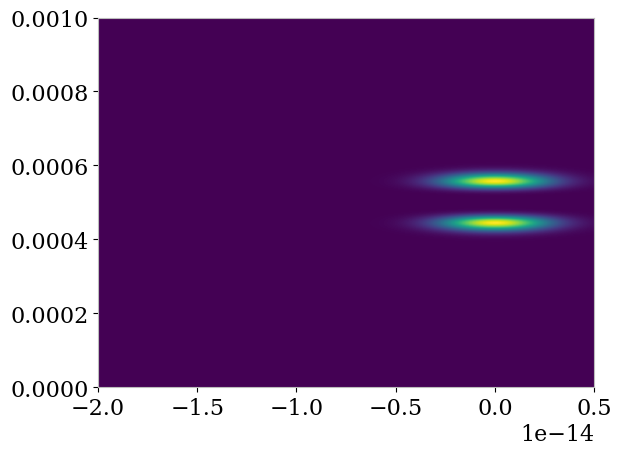

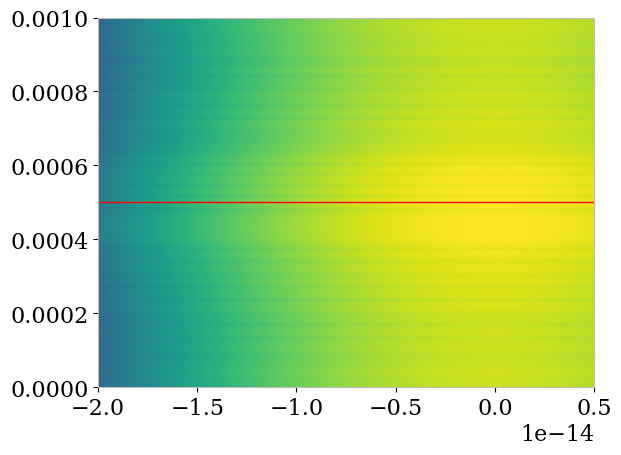

In [261]:
XUV_FF = np.array(XUV_FF)
plt.imshow(np.abs(XUV_NF[:, :, 250]).T, aspect='auto', extent=extent)
plt.xlim(-20e-15, 5e-15)
plt.show()

plt.imshow(np.log(np.abs(XUV_FF[:, :, 251]).T), aspect='auto', extent=extent)
plt.xlim(-20e-15, 5e-15)
plt.hlines(5e-4, -2e-14, 1e-14, color='r', linewidth=1)
plt.show()

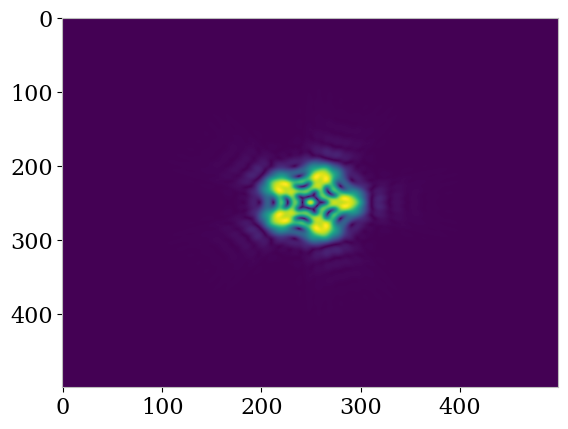

In [262]:
plt.imshow(np.abs(XUV_FF[300]).T, aspect='auto')

(-1e-14, 0.0)

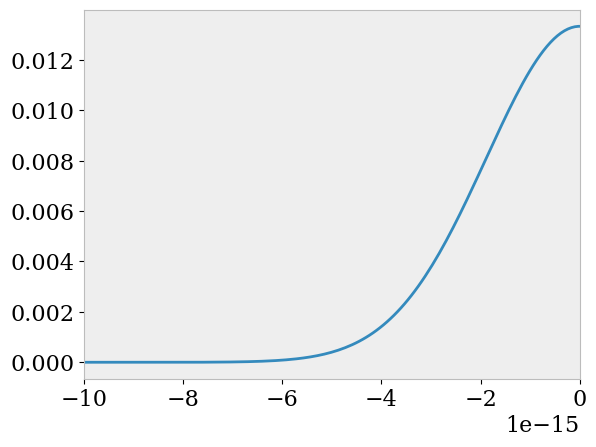

In [263]:
plt.plot(t_axis, np.abs(XUV_FF[:, 251, 251]))
plt.xlim(-1e-14, 0)

In [264]:
XUV_FF_sp, w_axis = Grating.Disperse2(XUV_FF, t_axis)

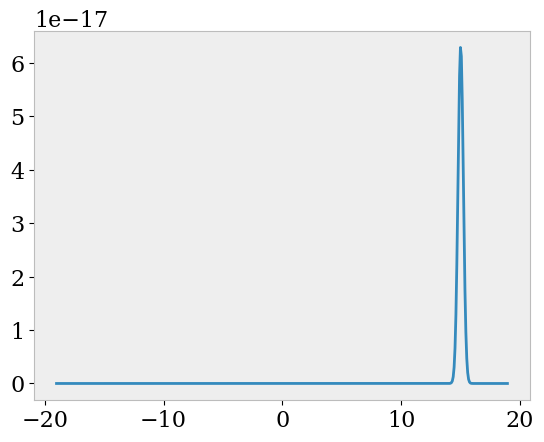

In [265]:
plt.plot(w_axis/IR.omega, np.abs(XUV_FF_sp[:, 251, 251]))